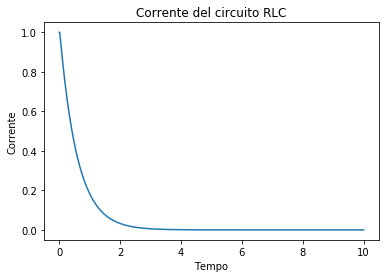

In [7]:
# Evoluzione Libera

import numpy as np
import matplotlib.pyplot as plt

L = 1
R = 60
C = 0.01
I0 = 1
Ip0 = 0
t = np.linspace(0,10,1000)

# ipp = (-r/l)ip + (-1/c*l)i
f = lambda r,l,c,i,ip: (-r/l)*ip + (-1/c*l)*i

I = np.zeros(len(t))
Ip = np.zeros(len(t))
I[0] = I0
Ip[0] = Ip0

for i in range(1,len(t)):
    I[i] = I[i-1] + Ip[i-1]*(t[i]-t[i-1])
    Ip[i] = Ip[i-1] + f(R,L,C,I[i-1],Ip[i-1])*(t[i]-t[i-1])
    
plt.figure(1)
plt.title('Corrente del circuito RLC')
plt.xlabel('Tempo')
plt.ylabel('Corrente')
plt.plot(t,I)
plt.show()

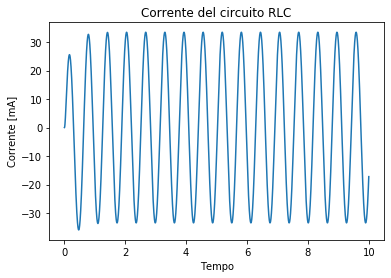

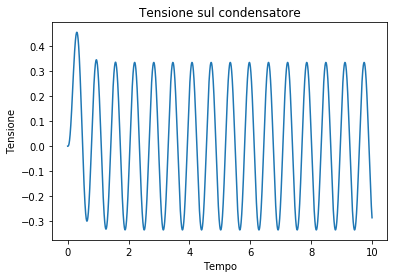

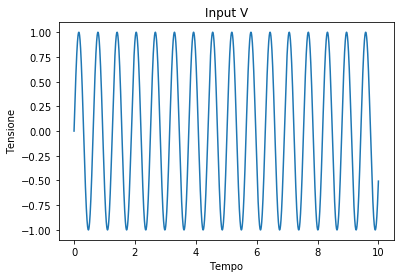

In [15]:
# Evoluzione Forzata

n = 10000
L = 1
R = 30
C = 0.01
I0 = 0
Ip0 = 0
t = np.linspace(0,10,n)

# EQUAZIONE DEL GENERATORE DI TENSIONE
# Step
ZerosN = 5000
#V = np.concatenate((np.zeros(ZerosN),np.ones(n-ZerosN)))
#Risonanza
omega = 1/(L*C)**(1/2)
V = np.sin(omega*t)

# ipp = (-r/l)ip + (-1/cl)i + Vp/l
f = lambda r,l,c,i,ip,Vp: (-r/l)*ip + (-1/c*l)*i + Vp/l

I = np.zeros(len(t))
Ip = np.zeros(len(t))
Vp = np.zeros(len(t))
Q = np.zeros(len(t))
I[0] = I0
Ip[0] = Ip0
Q[0] = 0

for i in range(1,len(t)):
    Vp[i] = (V[i]-V[i-1])/(t[i]-t[i-1])
    I[i] = I[i-1] + Ip[i-1]*(t[i]-t[i-1])
    Ip[i] = Ip[i-1] + f(R,L,C,I[i-1],Ip[i-1],Vp[i-1])*(t[i]-t[i-1])
    Q[i] = Q[i-1] + I[i-1]*(t[i]-t[i-1])
    
plt.figure(1)
plt.title('Corrente del circuito RLC')
plt.xlabel('Tempo')
plt.ylabel('Corrente [mA]')
plt.plot(t,I*1000)
plt.show()

plt.figure(2)
plt.title('Tensione sul condensatore')
plt.xlabel('Tempo')
plt.ylabel('Tensione')
plt.plot(t,Q/C)
plt.show()

plt.figure(3)
plt.title('Input V')
plt.xlabel('Tempo')
plt.ylabel('Tensione')
plt.plot(t,V)
plt.show()